<h1> <center> Projeto ED - Topic E - Spam </center> </h1>

<h2> <center> Fernando Lopes	N.º 106358 <br>Maria Sousa	N.º 109488<br>Paulo Pinho	N.º 71734   </center></h2>

### Introduction
In this project we will use the database "spambase" and will use three different classifiers: Random forest, Artificial Neural Networks and Logistic regression.
***

### Step 1 - Import the database.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#randomgenerator
import random as rd

# Splitter
from sklearn.model_selection import train_test_split
#Artificial Neural Networks
from sklearn.neural_network import MLPClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
#Random forest
from sklearn.ensemble import RandomForestClassifier
# import the metrics class
from sklearn import metrics

df1 = pd.read_csv('spambase.data', header=None)
df1.columns=["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove","word_freq_internet","word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report","word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email","word_freq_you", "word_freq_credit", "word_freq_your","word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology","word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project","word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$","char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "Binary_Spam"]
print("The database has ", df1.shape[1], "features and ", df1.shape[0], "examples.\n\n")
print(df1.head())

The database has  58 features and  4601 examples.


   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00 

***
### Step 2 - Calculate the correlation

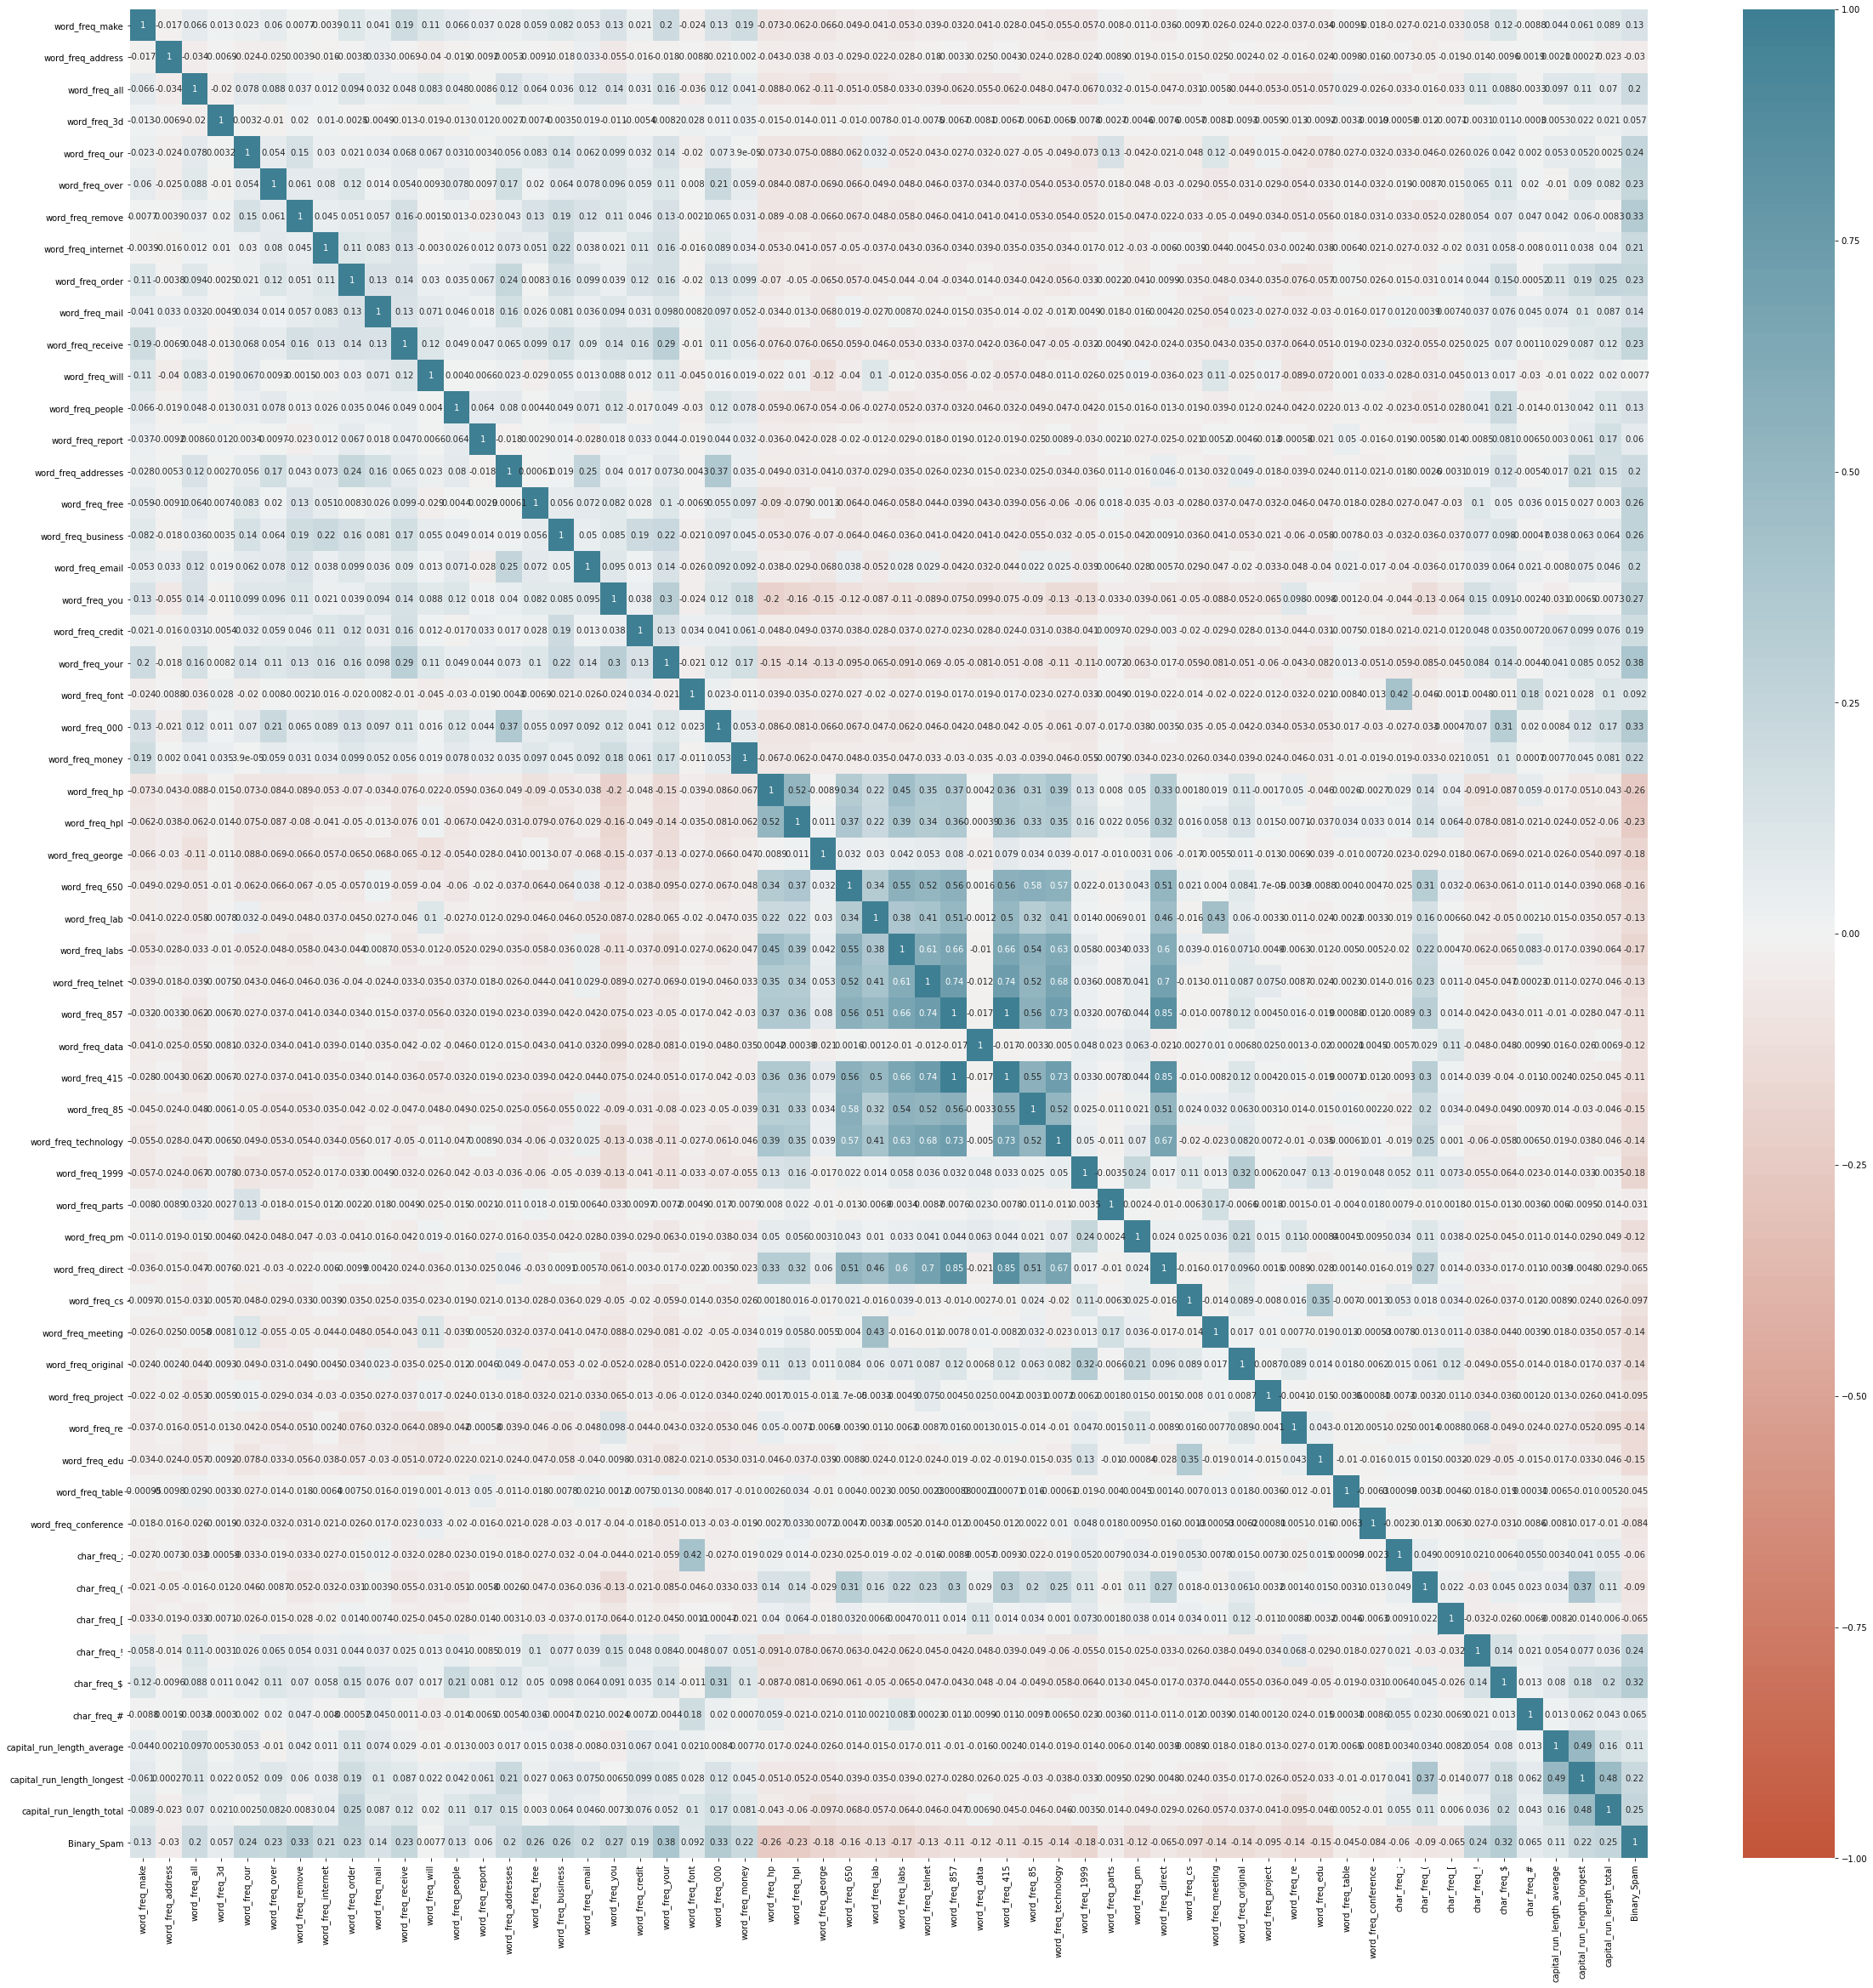

In [2]:
# Delete less relevant features based on the correlation with the output variable
cor = df1.corr()  # calculate correlations

# Correlation graph
plt.figure(figsize=(40, 40))
sns.heatmap(cor, annot=True, cmap=sns.diverging_palette(20, 220, n=200), vmin=-1, vmax=1)
plt.show()

***
### Step 3 - Feature selection based on correlation


Number of features on the original database -  58
Number of features after feature selection -  42 



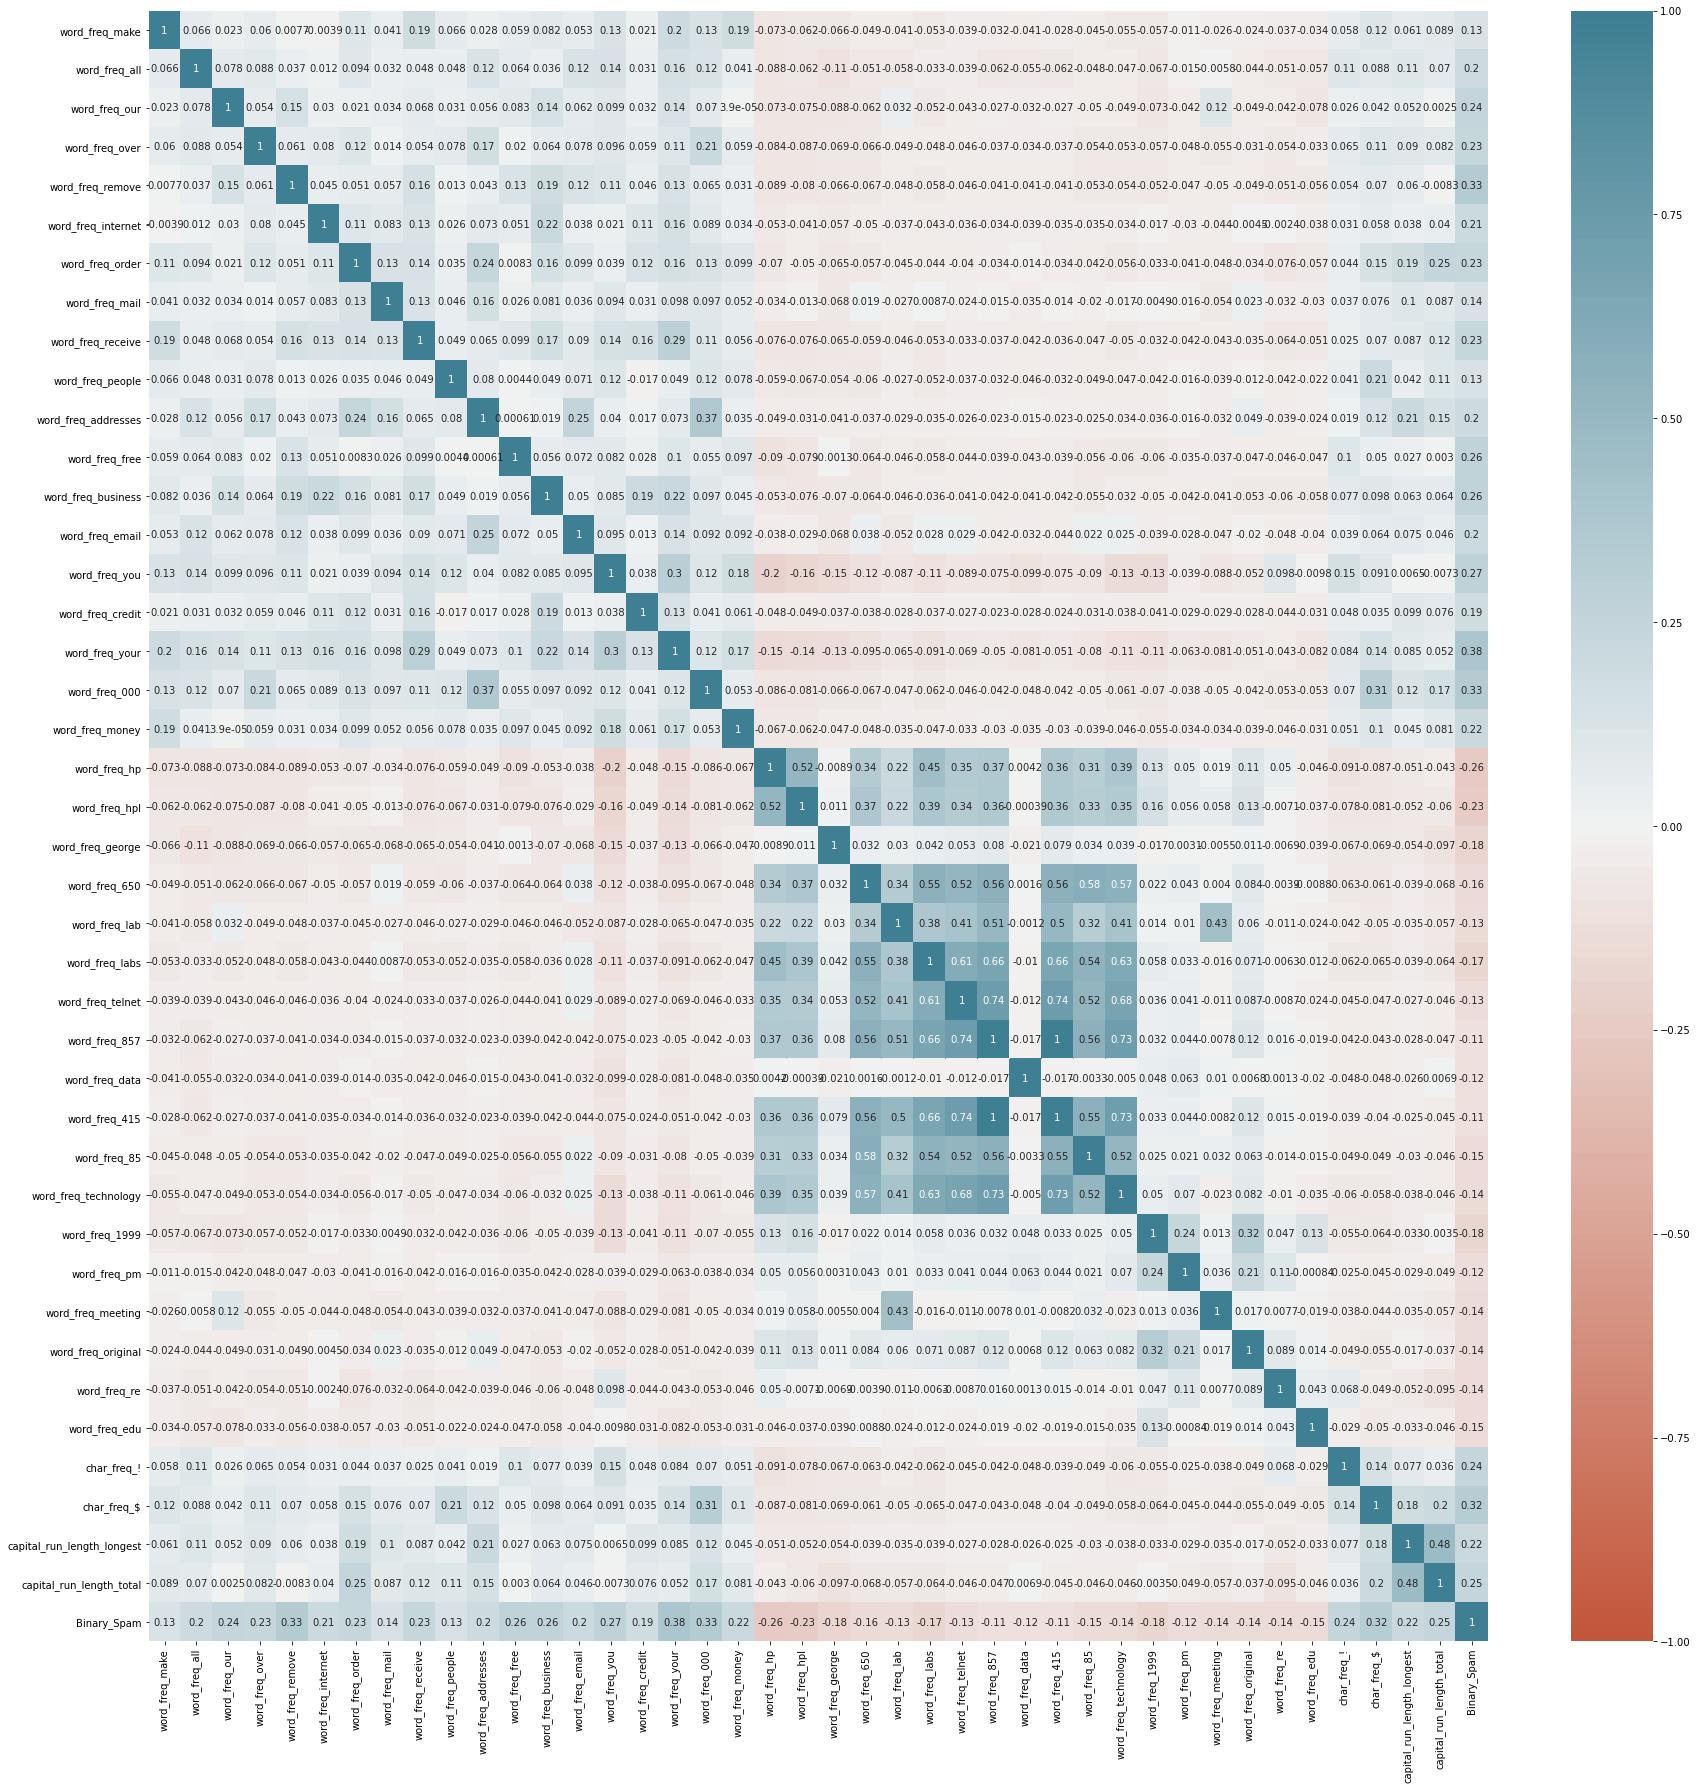

In [3]:
# Correlation with output variable
cor_target = abs(cor["Binary_Spam"])

nr_features = len(df1.columns)

aux = 0
for i in df1.columns:

    if cor_target[aux] < 0.11 or cor_target[aux] > 0.9:  # if two features are too different or too similar to each other, they don't carry information

        if i != "Binary_Spam":
            df1.drop(i, axis=1, inplace=True)

    aux += 1

dfaux = df1.drop("Binary_Spam", axis=1, inplace=False)

feature_cols = dfaux.columns

X = df1[feature_cols]  # features
Y = df1.Binary_Spam

print("\nNumber of features on the original database - ", nr_features)
print("Number of features after feature selection - ", len(df1.columns), "\n")


new_cor = df1.corr()



plt.figure(figsize=(30, 30))
sns.heatmap(new_cor, annot=True, cmap=sns.diverging_palette(20, 220, n=200), vmin=-1, vmax=1)
plt.show()

***
### Step 4 - Use the classifiers

- Random Forest

In [29]:
rand=rd.randint(0,2**32-1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=rand)

# model
randFor = RandomForestClassifier(n_estimators = 30, max_depth = 20, random_state=3) 

# fit the model with data
randFor.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

acc=metrics.accuracy_score(y_test, y_pred)
#prc=metrics.precision_score(y_test, y_pred)
#rec=metrics.recall_score(y_test, y_pred)
print("Accuracy:",acc * 100,"%")
accuracy_rf = acc * 100

Accuracy: 93.26818675352877 %


- Artificial Neural Networks

In [30]:
#Random_state foi dado por mim, para obter um resultado mais proximo do relatório
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=13)
clf = MLPClassifier(learning_rate='constant', random_state=0, momentum=0.2, learning_rate_init=0.3, max_iter=2000).fit(X_train, y_train)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100,"%")
accuracy_ann = metrics.accuracy_score(y_test, y_pred) * 100

Accuracy: 92.00695047784535 %


- Logistic Regression

In [31]:
rand=rd.randint(0,2**32-1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=rand)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(tol=(1*10**-8),max_iter=2000) #1977???

# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

acc=metrics.accuracy_score(y_test, y_pred)
prc=metrics.precision_score(y_test, y_pred)
rec=metrics.recall_score(y_test, y_pred)
print("Accuracy:",acc * 100,"%")
accuracy_lr = acc * 100

Accuracy: 91.96525515743757 %


***
### Step 5 - Evaluation of the obtained results

##### Results obtained in the paper
- Random Forest - Accuracy = 95.4575%
- Artificial Neural Networks - Accuracy = 92.4147%
- Logistic Regression - Accuracy = 92.4147%

##### Results obtained in our work

- Random Forest

In [32]:
print("Accuracy = ", accuracy_rf,"%")
print("Difference = ", 95.4575 - accuracy_rf,"%")

Accuracy =  93.26818675352877 %
Difference =  2.1893132464712295 %


- Artificial Neural Networks

In [33]:
print("Accuracy = ", accuracy_ann,"%")
print("Difference = ", 92.4147 - accuracy_ann,"%")

Accuracy =  92.00695047784535 %
Difference =  0.40774952215464566 %


- Logistic Regression

In [34]:
print("Accuracy = ", accuracy_lr,"%")
print("Difference = ", 92.4147 - accuracy_lr,"%")

Accuracy =  91.96525515743757 %
Difference =  0.44944484256242845 %


***
### Conclusion

The results we obtained in our work are very close to the results the authors of the paper obtained. The feature selection has little effect on the accuracy obtained, however it reduces the number of features analysed by 16, which is better in terms of processing.